In [25]:
import PIL.Image

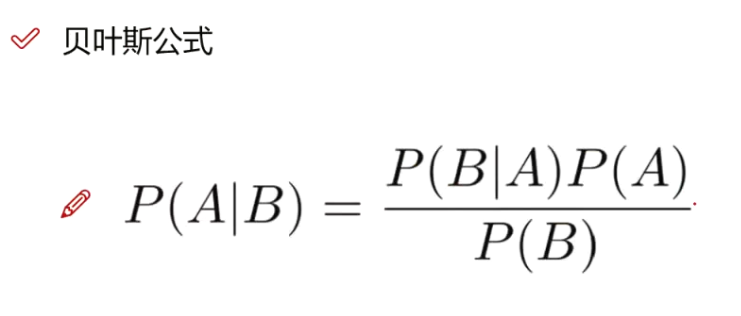

In [30]:
Image.open('img/贝叶斯算法-1.jpg')

**贝叶斯公式说明：逆向概率算法**  
    在B的情况下A的概率 = （在A的情况下B的概率 * A的概率）/ B的概率

#### 案例1：拼写纠正
  用户输入了一个不在字典中的单词

### 思路： argmaxc P(c|w) -> argmaxc P(w|c) * P(c) / P(w)
  * P(c)，文章中出现一个正确拼写词 c 的概率，也就是说，在英语文章中，c 出现的概率有多大。（先验概率）
  * P(w|c)，在用户想键入 c 的情况下敲成 w 的概率，因为这个是代表用户会以多大的概率把 c 敲成 w。
  * argmaxc，用来枚举所有可能的 c 并且选取概率最大的

In [31]:
import re, collections

In [32]:
def words(text):
    return re.findall('[a-z]+', text.lower())

In [33]:
def train(features):
    model = collections.defaultdict(lambda: 1)
    for f in features:
        model[f] += 1
    return model

In [34]:
NWORDS = train(words(open('data/Twilight.txt').read()))

In [35]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'

In [36]:
def edits1(word):
    n = len(word)
    return set([word[0:i] + word[i+1:] for i in range(n)] +                           # deletion 删除某个字符
              [word[0:i] + word[i+1] + word[i] + word[i+2:] for i in range(n-1)] +    # transposition 调换某两个字符位置
              [word[0:i] + c + word[i+1:] for i in range(n) for c in alphabet] +      # alteration 转换某个字符
              [word[0:i] + c + word[i:] for i in range(n+1) for c in alphabet])       # insertion 插入某个字符

In [37]:
def known_edits2(word):
    return set(e2 for e1 in edits1(word) for e2 in edits1(e1) if e2 in NWORDS)

In [38]:
def known(words):
    return set(w for w in words if w in NWORDS)

In [39]:
def correct(word):
    candidates = known([word]) or known(edits1(word)) or known_edits2(word) or [word]
    return max(candidates, key=lambda w: NWORDS[w])

In [42]:
#ligha #bellla #idward
correct('idward')

'edward'

### 以下为测试内容 *（帮助理解上述代码）*  

In [43]:
sorted(NWORDS.items(), key=lambda w: w[1], reverse=True)

[('i', 6556),
 ('the', 5200),
 ('to', 3504),
 ('he', 2786),
 ('was', 2413),
 ('and', 2241),
 ('my', 2238),
 ('you', 1956),
 ('a', 1944),
 ('of', 1822),
 ('it', 1633),
 ('in', 1596),
 ('his', 1575),
 ('me', 1555),
 ('t', 1465),
 ('that', 1416),
 ('s', 964),
 ('as', 915),
 ('at', 870),
 ('with', 864),
 ('but', 772),
 ('for', 747),
 ('on', 703),
 ('him', 613),
 ('be', 597),
 ('she', 520),
 ('had', 519),
 ('eyes', 498),
 ('were', 489),
 ('so', 472),
 ('we', 464),
 ('not', 456),
 ('what', 447),
 ('edward', 439),
 ('have', 430),
 ('her', 420),
 ('could', 411),
 ('then', 410),
 ('out', 409),
 ('from', 404),
 ('no', 401),
 ('said', 388),
 ('up', 386),
 ('if', 386),
 ('d', 379),
 ('back', 372),
 ('like', 367),
 ('there', 366),
 ('they', 363),
 ('all', 357),
 ('would', 357),
 ('voice', 340),
 ('asked', 331),
 ('didn', 328),
 ('just', 325),
 ('this', 321),
 ('face', 311),
 ('don', 308),
 ('m', 305),
 ('when', 303),
 ('one', 299),
 ('do', 298),
 ('now', 289),
 ('see', 284),
 ('into', 278),
 ('your

In [44]:
edits1('idward')

{'adward',
 'aidward',
 'bdward',
 'bidward',
 'cdward',
 'cidward',
 'ddward',
 'didward',
 'diward',
 'dward',
 'edward',
 'eidward',
 'fdward',
 'fidward',
 'gdward',
 'gidward',
 'hdward',
 'hidward',
 'iadward',
 'iaward',
 'ibdward',
 'ibward',
 'icdward',
 'icward',
 'idaard',
 'idard',
 'idaward',
 'idawrd',
 'idbard',
 'idbward',
 'idcard',
 'idcward',
 'iddard',
 'iddward',
 'ideard',
 'ideward',
 'idfard',
 'idfward',
 'idgard',
 'idgward',
 'idhard',
 'idhward',
 'idiard',
 'idiward',
 'idjard',
 'idjward',
 'idkard',
 'idkward',
 'idlard',
 'idlward',
 'idmard',
 'idmward',
 'idnard',
 'idnward',
 'idoard',
 'idoward',
 'idpard',
 'idpward',
 'idqard',
 'idqward',
 'idrard',
 'idrward',
 'idsard',
 'idsward',
 'idtard',
 'idtward',
 'iduard',
 'iduward',
 'idvard',
 'idvward',
 'idwaad',
 'idwaard',
 'idwabd',
 'idwabrd',
 'idwacd',
 'idwacrd',
 'idwad',
 'idwadd',
 'idwadr',
 'idwadrd',
 'idwaed',
 'idwaerd',
 'idwafd',
 'idwafrd',
 'idwagd',
 'idwagrd',
 'idwahd',
 'idwa

In [46]:
known_edits2('idward')

{'coward', 'edward', 'toward', 'upward', 'ward'}

In [47]:
print(NWORDS['edward'])
print(NWORDS['toward'])

439
120
